In [1]:
!pip install tensorflow keras numpy pandas matplotlib seaborn opencv-python scikit-learn albumentations scipy h5py pillow


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Convert Matlab to Python to convert .mat to .jpg

In [ ]:
import os
import h5py
import numpy as np
from PIL import Image

input_folder = "./Data"
output_folder = "./Output_Images"
os.makedirs(output_folder, exist_ok=True)

mat_files = [f for f in os.listdir(input_folder) if f.endswith(".mat")]

def save_as_jpg(image_array, output_path):
    image_normalized = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array)) * 255
    image_normalized = image_normalized.astype(np.uint8) 
    
    image = Image.fromarray(image_normalized)
    image.save(output_path)

for file in mat_files:
    file_path = os.path.join(input_folder, file)
    
    with h5py.File(file_path, "r") as mat_data:
        print(f"Processing file: {file}")
        
        cjdata = mat_data['cjdata']
        
        image = np.array(cjdata['image'])  
        label = np.array(cjdata['label'])
        label_folder = os.path.join(output_folder, str(label[0][0]))  
        os.makedirs(label_folder, exist_ok=True)
        
        output_path = os.path.join(label_folder, file.replace(".mat", ".jpg"))
        save_as_jpg(image, output_path)
        print(f"Saved {file} as {output_path}")

Processing file: 1.mat
Saved 1.mat as ./Output_Images\1.0\1.jpg
Processing file: 10.mat
Saved 10.mat as ./Output_Images\1.0\10.jpg
Processing file: 100.mat
Saved 100.mat as ./Output_Images\1.0\100.jpg
Processing file: 1000.mat
Saved 1000.mat as ./Output_Images\3.0\1000.jpg
Processing file: 1001.mat
Saved 1001.mat as ./Output_Images\3.0\1001.jpg
Processing file: 1002.mat
Saved 1002.mat as ./Output_Images\3.0\1002.jpg
Processing file: 1003.mat
Saved 1003.mat as ./Output_Images\3.0\1003.jpg
Processing file: 1004.mat
Saved 1004.mat as ./Output_Images\3.0\1004.jpg
Processing file: 1005.mat
Saved 1005.mat as ./Output_Images\3.0\1005.jpg
Processing file: 1006.mat
Saved 1006.mat as ./Output_Images\3.0\1006.jpg
Processing file: 1007.mat
Saved 1007.mat as ./Output_Images\3.0\1007.jpg
Processing file: 1008.mat
Saved 1008.mat as ./Output_Images\3.0\1008.jpg
Processing file: 1009.mat
Saved 1009.mat as ./Output_Images\3.0\1009.jpg
Processing file: 101.mat
Saved 101.mat as ./Output_Images\1.0\101.jpg

In [ ]:
from PIL import Image
import os
import numpy as np
for i in range(1,4):
    input_folder=str("./Output_Images/"+str(i)+".0")
    images = [f for f in os.listdir(input_folder) if f.endswith(('.jpg'))]
    for image_name in images:
        image_path = os.path.join(input_folder, image_name)
        image = Image.open(image_path)
        image_array=np.array(image)
        print(image_array.shape)
        print(image_array.max(),image_array.min())
    # print(input_folder)

(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
252 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
254 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
253 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
251 0
(512, 512)
255 0
(512, 512)
251 0
(512, 512)
255 0
(512, 512)
252 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
254 0
(512, 512)
253 0
(512, 512)
253 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
245 0
(512, 512)
251 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
254 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
251 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255 0
(512, 512)
255

KeyboardInterrupt: 

Preprocessing

In [ ]:
from PIL import Image
import os
import numpy as np
normalized_images=[]
for i in range(1,4):
    input_folder=str("./Output_Images/"+str(i)+".0")
    images = [f for f in os.listdir(input_folder) if f.endswith(('.jpg'))]
    for image_name in images:
        image_path = os.path.join(input_folder, image_name)
        image = Image.open(image_path)
        gray_image = image.convert('L')
        image_array = np.array(gray_image)
        normalized_image = image_array / 255.0 #it should be between 0 and 1
        normalized_images.append(normalized_image)
    print(str(len(normalized_images))+" for folder"+str(i))



708 for folder1
2134 for folder2
3064 for folder3


In [ ]:
#the length of labels
f1=708
f2=2134-708
f3=3064-2134
print(f1,f2,f3)

708 1426 930


In [13]:
normalized_images[0].shape

(512, 512)

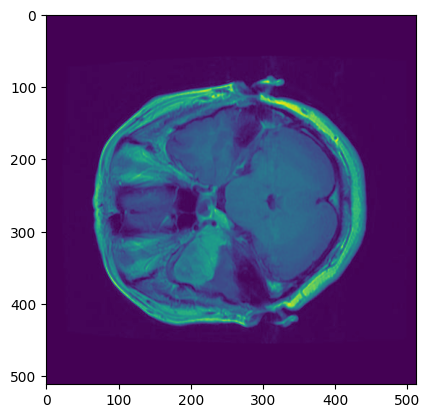

In [18]:
import matplotlib.pyplot as plt 
plt.imshow(normalized_images[0])

In [ ]:
#save labels
normalized_labels=[]
for i in range(0,708):
    normalized_labels.append(1)
for j in range(708,2134):
    normalized_labels.append(2)
for k in range(2134,3064):
    normalized_labels.append(3)


3064


In [ ]:
#change names 
x=[]
x=normalized_images
y=[]
y=normalized_labels

Model Definition